<a href="https://colab.research.google.com/github/RobGuedes/portfolio-optimization-litreview/blob/main/notebooks/Litstudy%20Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of using litstudy

This notebook shows an example of how to use `litstudy` from inside a Jupyter notebook. It shows how to load a dataset, plot statistics, perform topic modeling, do network analysis, and some more advanced features.

This notebook focuses on the topic of programming model for GPUs. GPUs (Graphic Processing Units) are specialized processors that are used in many data centers and supercomputers for data processing and machine learning. However, programming these devices remaining difficult, which is why there is a plethora of research on developing programming models for GPUs.

## Imports

In [3]:
!pip install litstudy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 18.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for litstudy: filename=litstudy-1.0.6-py3-none-any.whl size=50026 sha256=d4f3b40c7e61049edac5c962ab4ee9168cfc9a9b65f5f10e37e804c5c576c618
  Stored in directory: /root/.c

In [4]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

## Collecting the dataset

For this example, we have queried both IEEE Xplore and Springer Link for `"GPU" and "programming model"`. IEEE Xplore gives 5 CSV files (1 per page) and Springer Link gives a single CSV file. We load all files document sets and merge the resulting document sets.

In [5]:
# Load the CSV files
docs_scopus = litstudy.load_scopus_csv('mq2_scopus_1.csv')
print(len(docs_scopus), 'papers loaded from Scopus')


1132 papers loaded from Scopus


## General statistics

litstudy supports plot many general statistics of the document set as histograms. We show some simple examples below.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


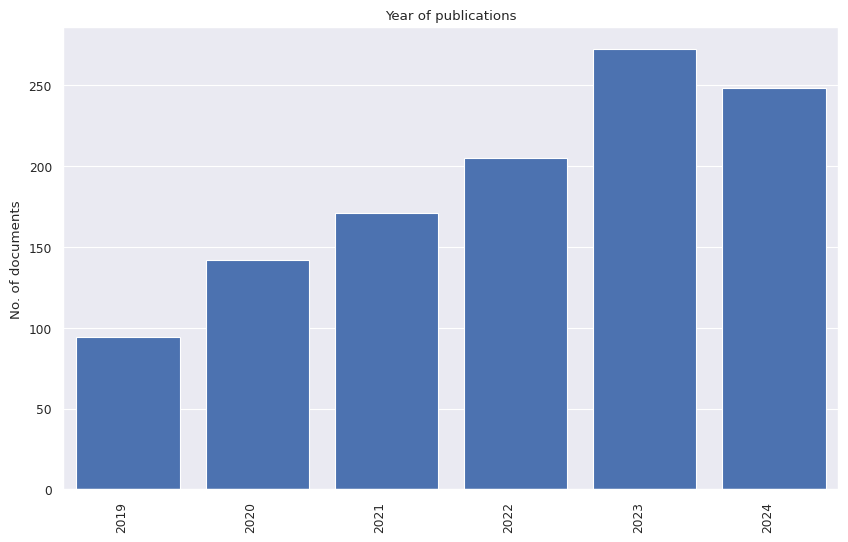

In [12]:
docs = docs_scopus
litstudy.plot_year_histogram(docs, vertical=True);

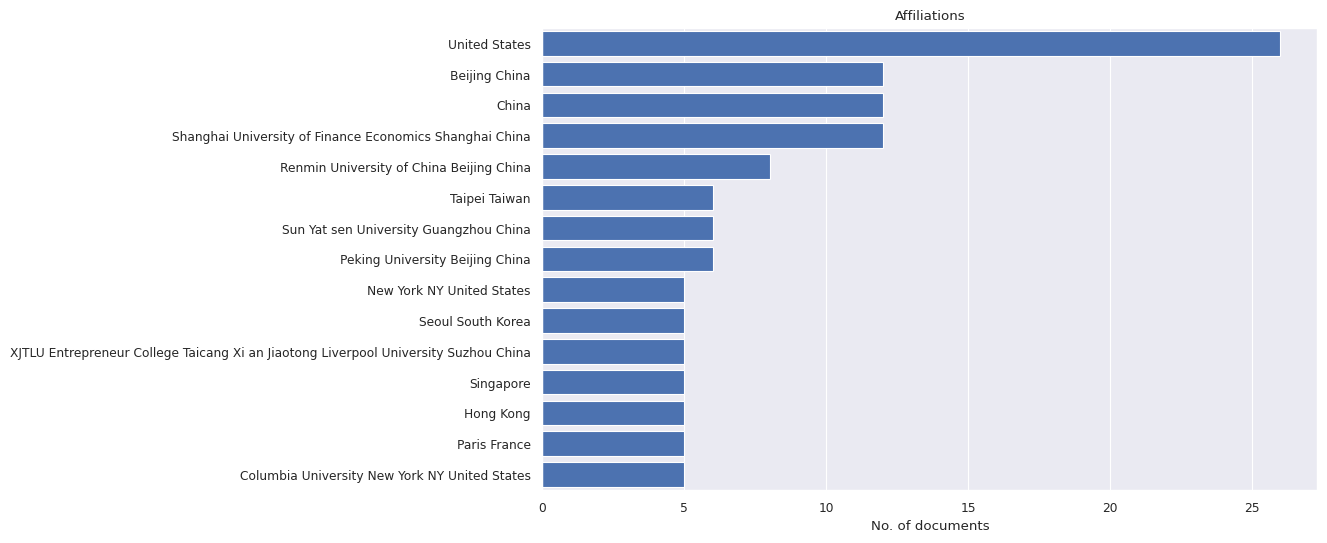

In [13]:
litstudy.plot_affiliation_histogram(docs, limit=15);

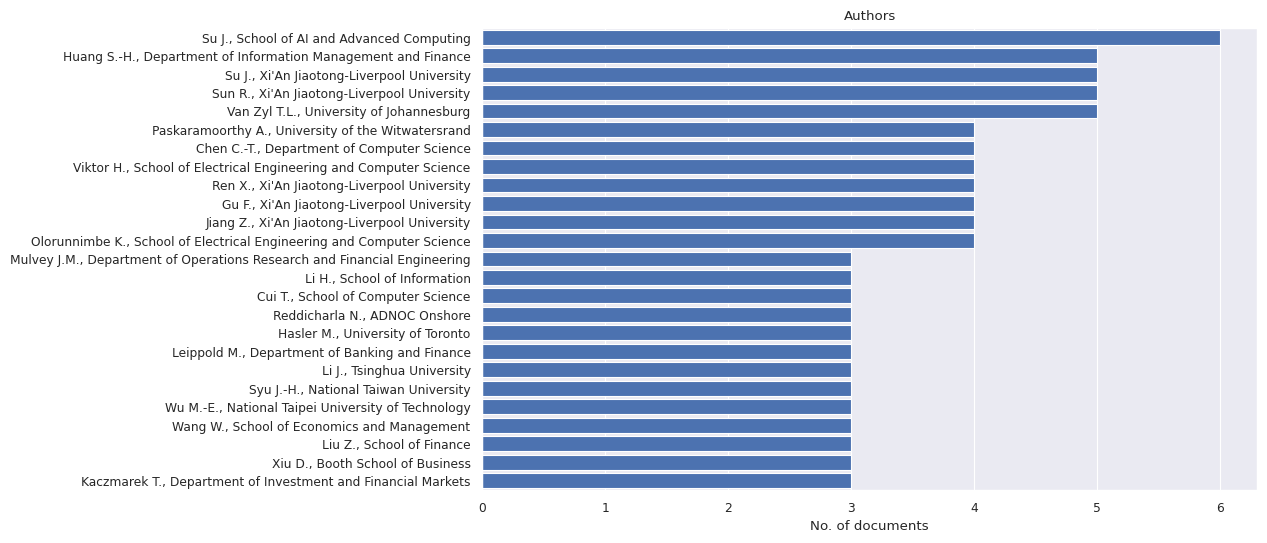

In [14]:
litstudy.plot_author_histogram(docs);

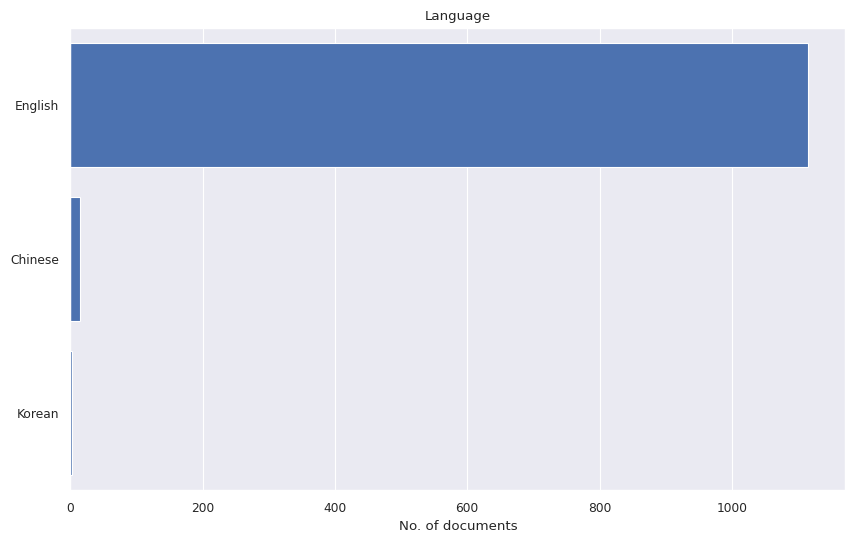

In [15]:
litstudy.plot_language_histogram(docs);

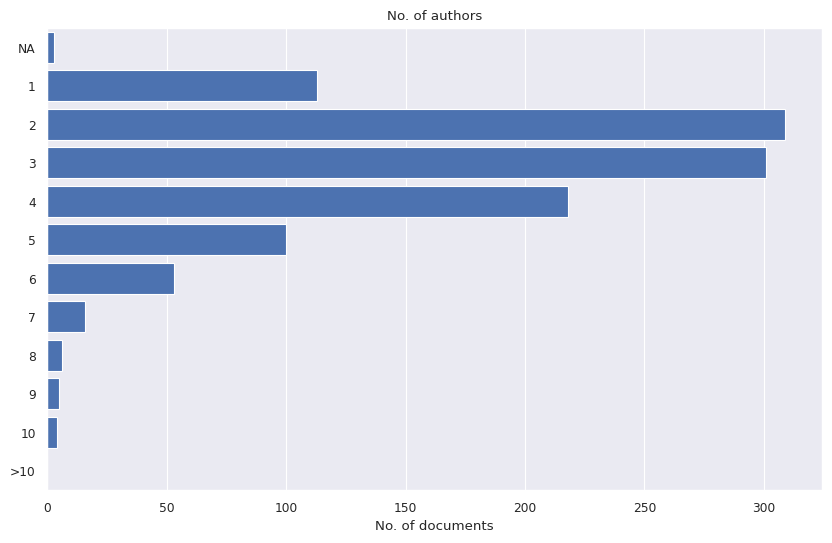

In [16]:
litstudy.plot_number_authors_histogram(docs);

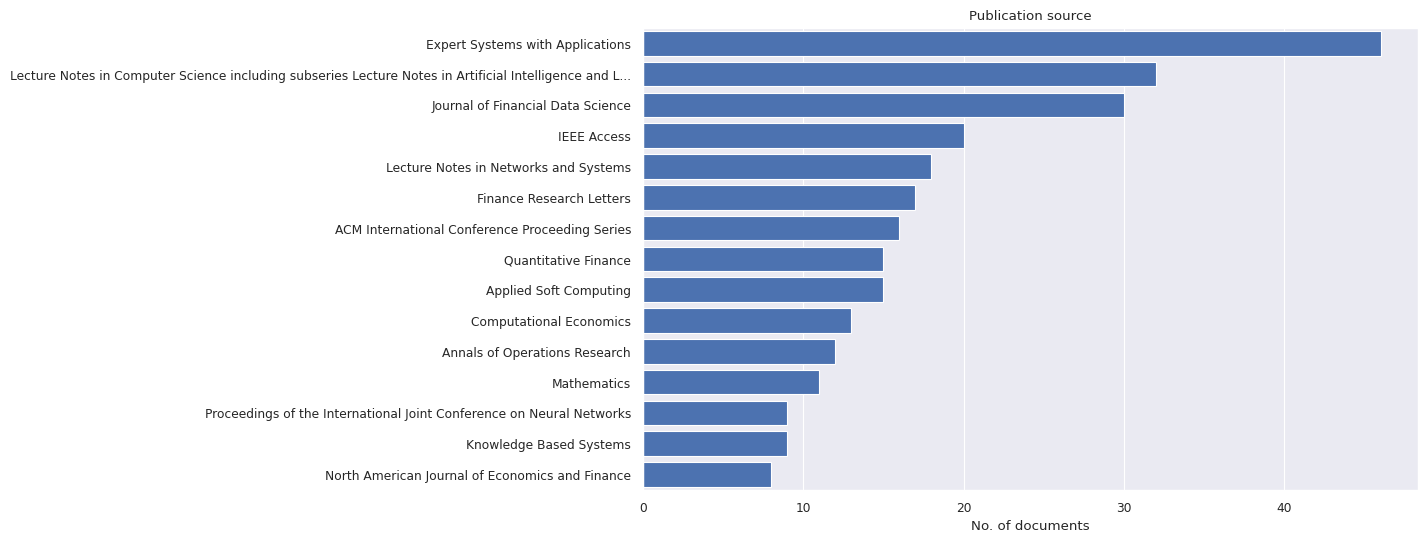

In [18]:
# This names are long, which is why a short abbreviation is provided.
mapping = {

}
# "Journal of multi-criteria decision analysis": "JOMCDA"

litstudy.plot_source_histogram(docs, mapper=mapping, limit=15);

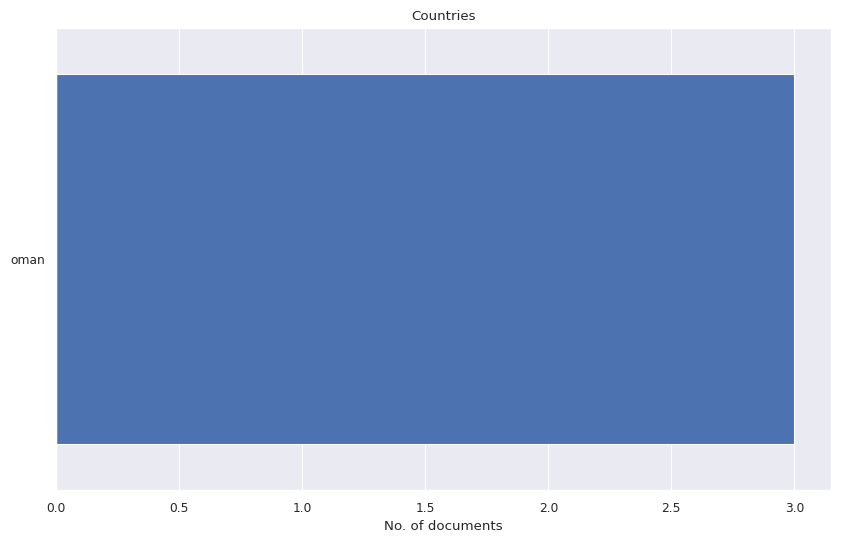

In [20]:
litstudy.plot_country_histogram(docs, limit=15);

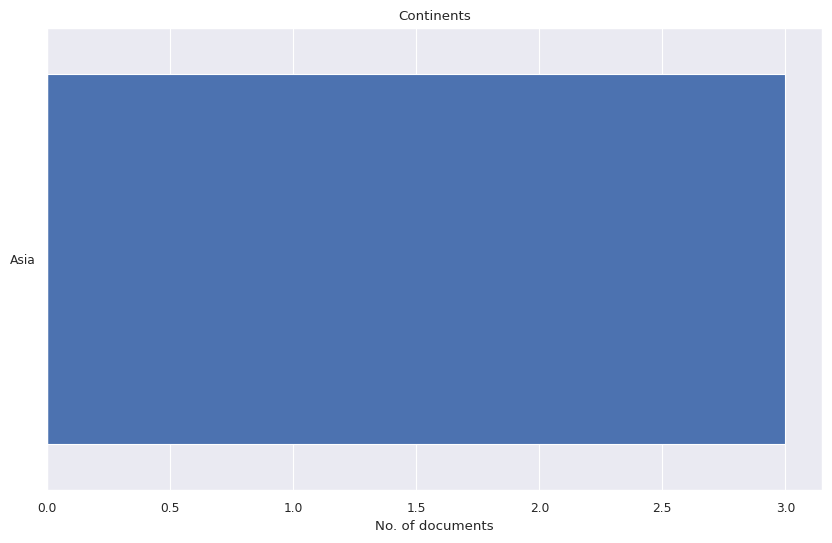

In [21]:
litstudy.plot_continent_histogram(docs);

## Network analysis

The network below shows an example of a co-citation network.
This is a type of network where nodes represent documents and edges represent pairs of documents that have been cited together simulatenously by other papers. The strength of the edges indicates how often two documents have been cited together.
Two papers with a high co-citation strength (i.e., stronger edge) are usually highly related.

In [22]:
litstudy.plot_cocitation_network(docs, max_edges=500)

no edges given


## Topic modeling

litstudy supports automatic topic discovery based on the words used in documents abstracts. We show an example below. First, we need to build a corpus from the document set. Note that `build_corpus` supports many arguments to tweak the preprocessing stage of building the corpus. In this example, we pass `ngram_threshold=0.85`. This argument adds commonly used n-grams (i.e., frequent consecutive words) to the corpus. For instance, `artificial` and `intelligence` is a bigram, so a token `artificial_intelligence` is added to the corpus.

In [23]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)

We can compute a word distribution using `litstudy.compute_word_distribution` which shows how often each word occurs across all documents. In this example, we focus only on n-grams by selecting tokens that contain a `_`. We see that words such as `artificial intelligence` and `trade offs` indeed have been recognized as common bigrams.

In [24]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
actor_critic,28
artificial_intelligence,85
author_exclusive,101
black_box,14
black_litterman,12
...,...
transaction_costs,56
united_states,14
university_press,6
wiley_periodicals,7


Let's visualize the word distribution from this corpus.

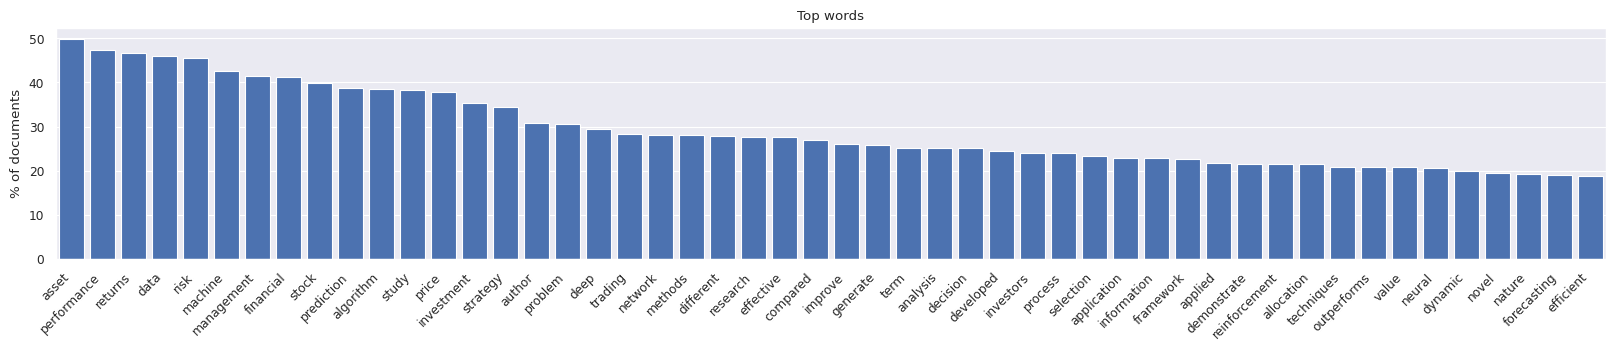

In [25]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

This word distribution looks normal. Next, we train an NMF topic model. Topic modeling is a technique from natural language processing for discovering abstract "topics" in a set of document. We need to manually select the number of desired topics. Here we choose 15 topics. It is recommended to experiment with more or less topics to obtain topics that are more fine-grained or more coarse-grained

In [35]:
num_topics = 3
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


To understand the result of NMF, we can print the top 3 words for each topic.

In [36]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['problem', 'quantum', 'algorithm', 'constraints', 'solution']
Topic 2: ['stock', 'prediction', 'price', 'factors', 'forecasting']
Topic 3: ['reinforcement', 'agent', 'deep', 'policy', 'trading']


An alternative way to visualize the output of NMF is to plot each discovered topic as a word cloud. The size of each word in a cloud indicate the importance of that word for that topic.

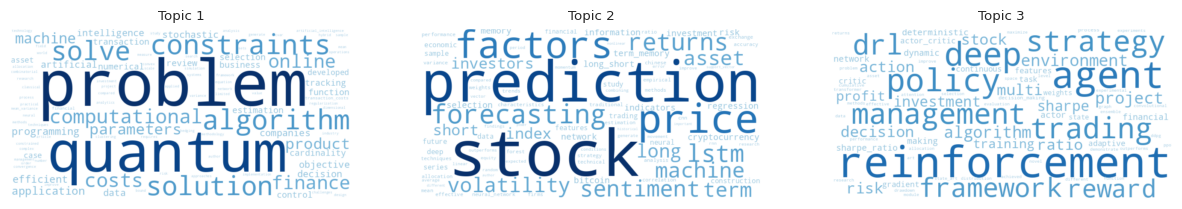

In [37]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=3);

These 15 topics look promising. For example, there is one topic on graphs, one on OpenACC (the open accelerators programming standard), one on OpenCL (the open compute language), one on FPGAs (field-programmable gate array), etc.

We can visualize the results as a "landscape" plot. This is a visual appealing way to place documents on 2D plane. The documents are placed such that similar documents are located closed to each other. However, this is a non-linear embedding so the distances between the documents are not linear.

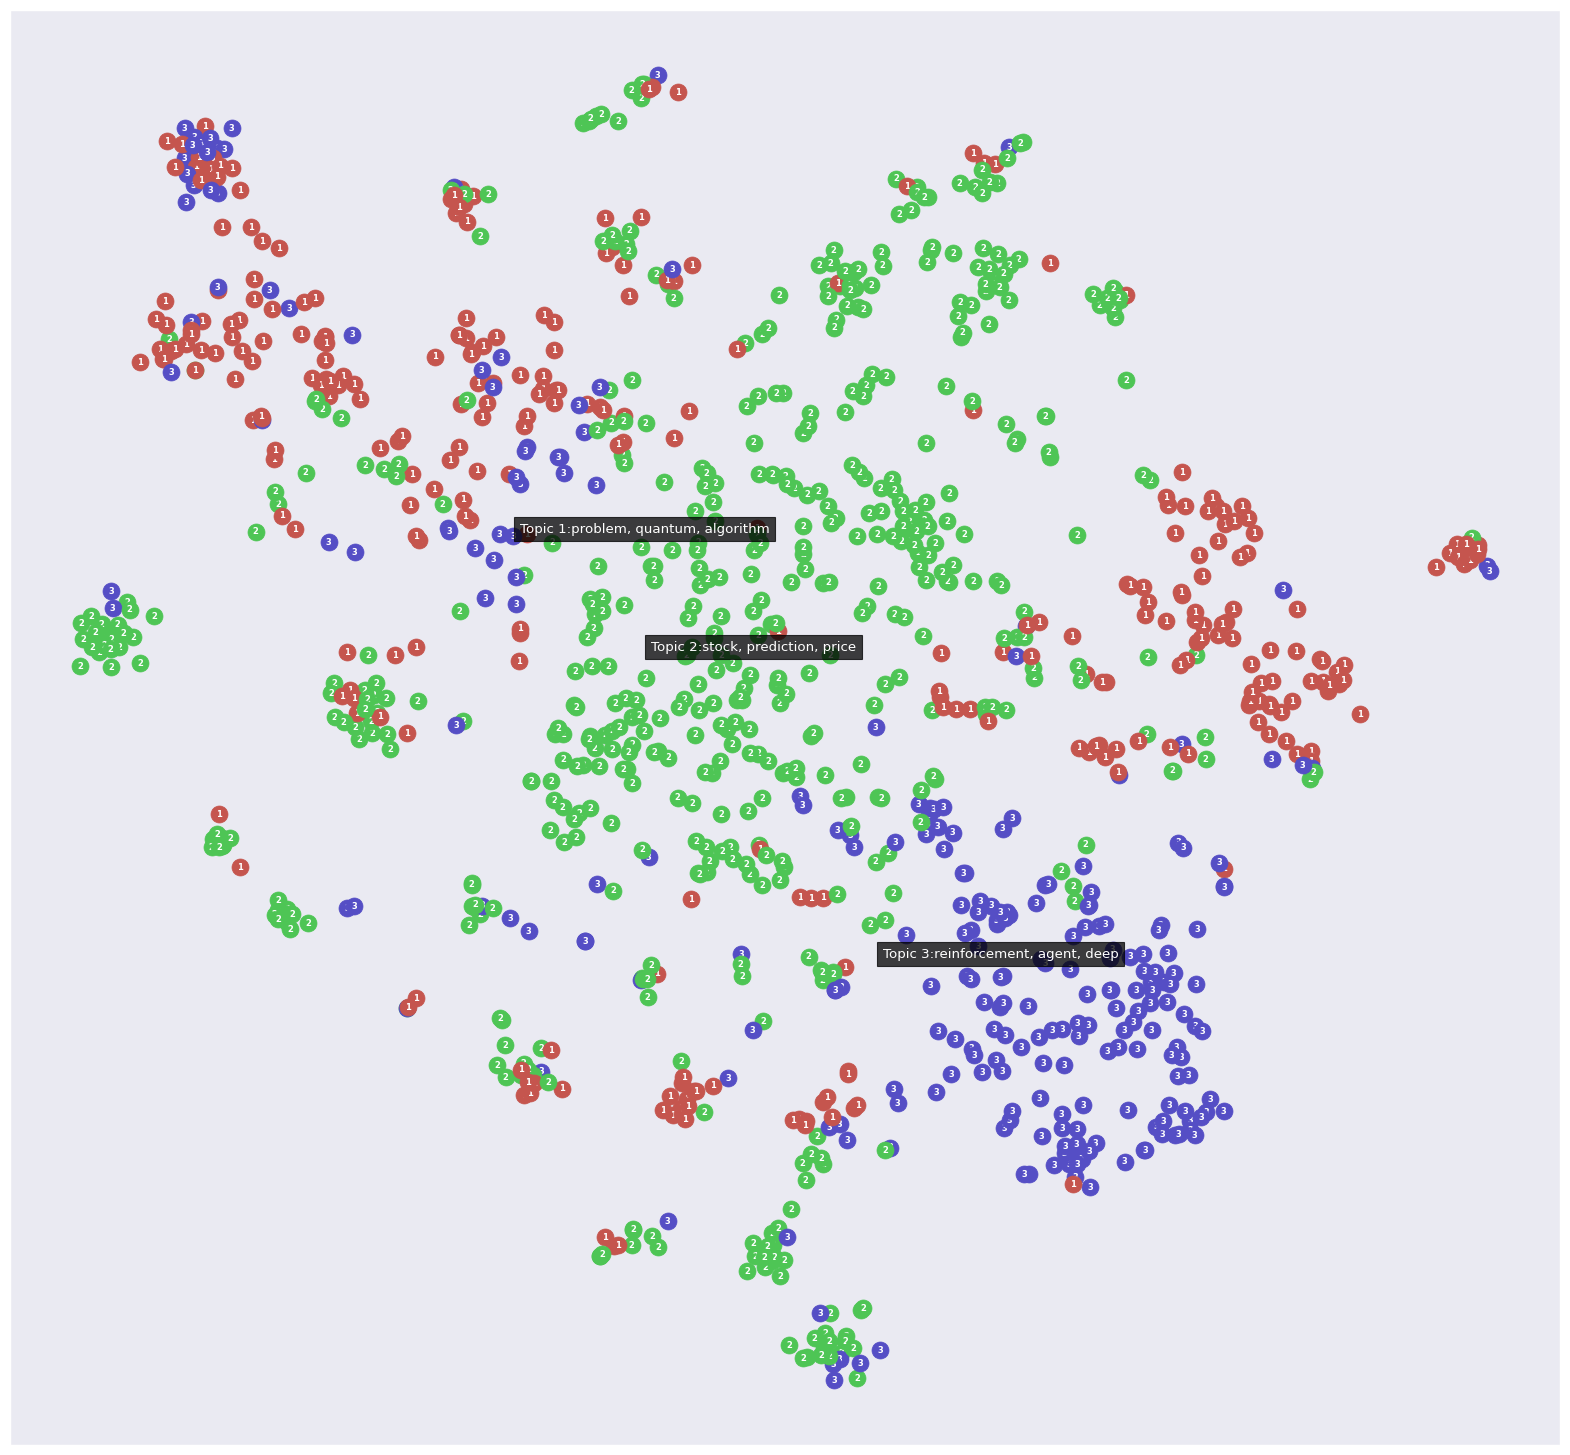

In [38]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

## Advanced topic modeling

We can combine the results of topic modeling with the plotting of statistics. Here we show we a simple example.

One of the topics appears to be on "deep_learning". First, we find the topic id for the topic that most strongly belongs to "deep_learning".

In [41]:
topic_id = topic_model.best_topic_for_token('reinforcement')

Let's print the top 10 papers that most stongly belong to this topic to check the results. We see that these are indeed documents on the topic of deep learning.

In [42]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)

MULTI-AGENT PROXIMAL POLICY OPTIMIZATION FOR PORTFOLIO OPTIMIZATION
A Novel Anti-Risk Method for Portfolio Trading Using Deep Reinforcement Learning
Risk-Sensitive Portfolio Management by using Distributional Reinforcement Learning
Developing A Multi-Agent and Self-Adaptive Framework with Deep Reinforcement Learning for Dynamic Portfolio Risk Management
Ensemble Strategy Based on Deep Reinforcement Learning for Portfolio Optimization
Research on portfolio optimization models using deep deterministic policy gradient
Soft imitation reinforcement learning with value decomposition for portfolio management
Deep Reinforcement Learning Task for Portfolio Construction
Online Optimal Investment Portfolio Model Based on Deep Reinforcement Learning
Deep Reinforcement Learning for Optimizing Finance Portfolio Management


Next, we annotate the document set with a "dl_topic" tag for document that strongly belong to this topic (i.e., weight above a certain threshold).

After this, we define two groups: documents that have the tag "dl_topic" and documents that do not have this tag. Now we can, for instance, print the publications over the years to see if interest in deep learning has increased or decreased over the years.

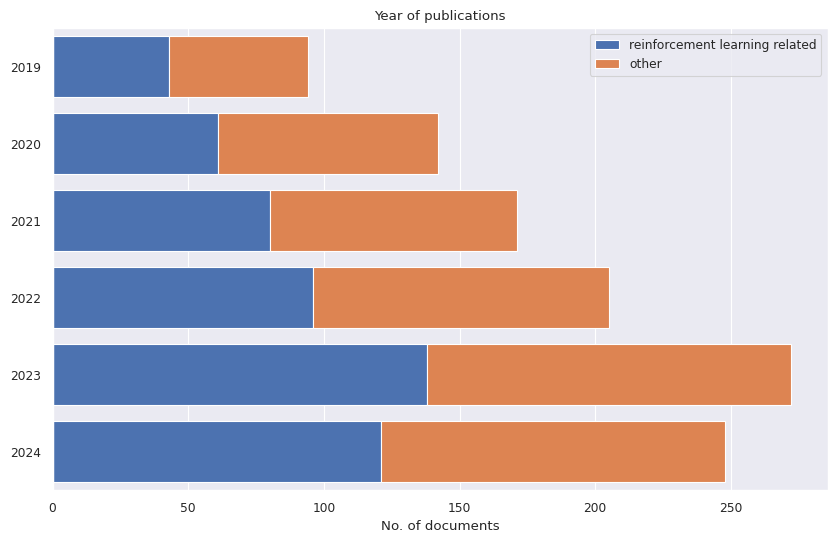

In [44]:
threshold = 0.2
rl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('rl_topic', rl_topic)


groups = {
    'reinforcement learning related': 'rl_topic',
    'other': 'not rl_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

The histogram shows that interest in deep learning has clearly risen over the years. We can even calculate the exact amount by calculating the percentage of documents on deep learning each year. The example below shows that this percentage has increased from just 3.4% in 2011 to 13.6% in 2021.

In [45]:
table = litstudy.compute_year_histogram(docs, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100

,reinforcement learning related,other
2019,45.744681,54.255319
2020,42.957746,57.042254
2021,46.783626,53.216374
2022,46.829268,53.170732
2023,50.735294,49.264706
2024,48.790323,51.209677


Alternatively, we can plot the two groups for the publications source. We can see that some journals/conferences have a strong focus on deep learning (e.g. "Neural Computing and Applications"), while others have no or few publications on deep learning (e.g. "Journal of Real Time Image Processing").

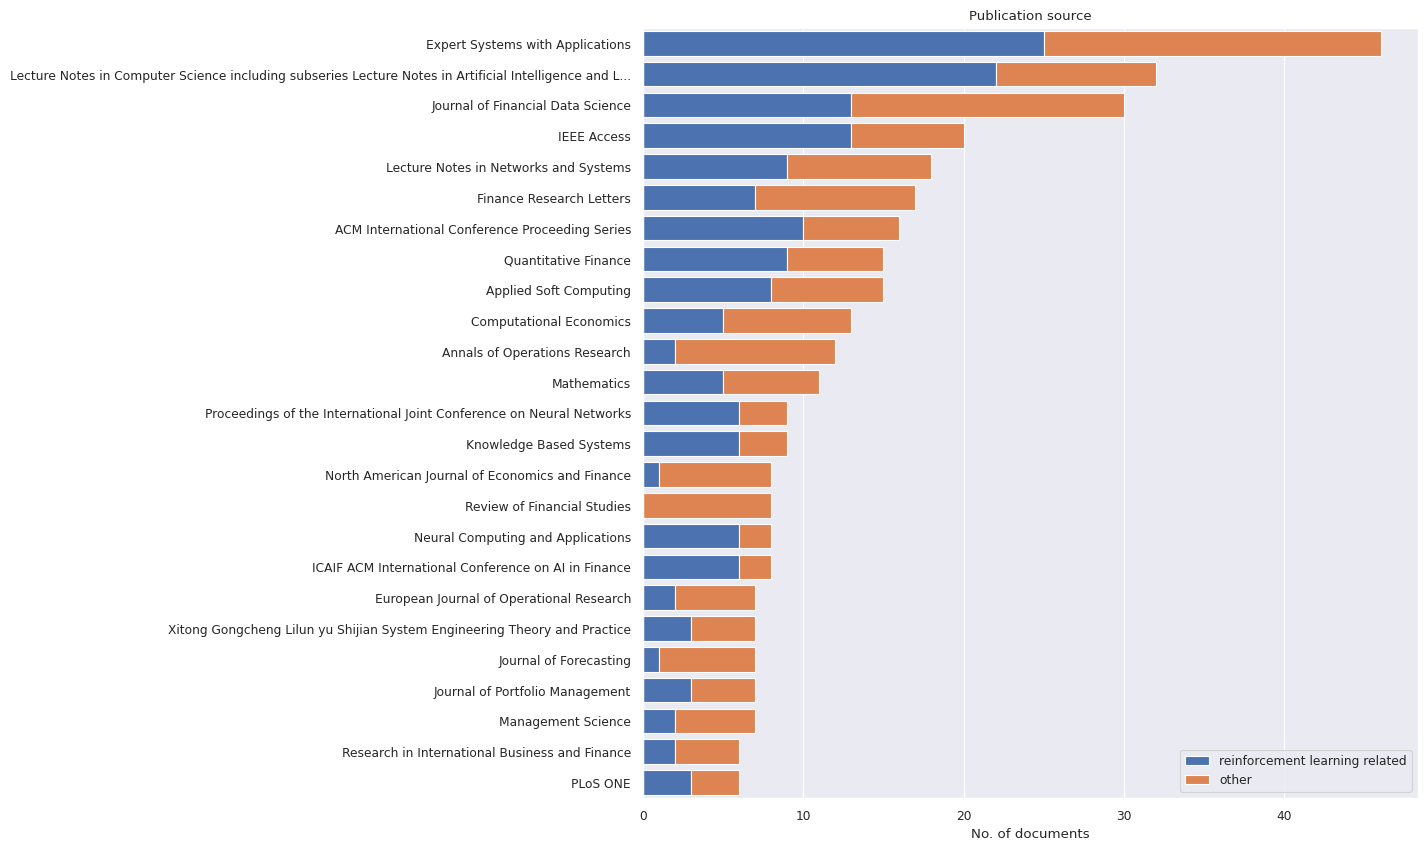

In [46]:
plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs, groups=groups, limit=25, stacked=True);

We can even calculate the most popular publication venues for deep learning in our dataset using some simple Panda functions. It appears that "Neural Computing and Applications" is the most popular publication venue.

In [47]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs, groups=groups)

# Add column 'total'
table['total'] = table['reinforcement learning related'] + table['other']

# Remove rare venues that have less than 5 publications
table = table[table['total'] >= 5]

# Add column 'ratio'
table['ratio'] = table['reinforcement learning related'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

,reinforcement learning related,other,total,ratio
IEEE International Conference on Big Data Analytics ICBDA,5,0,5,100.000000
International Conference on Information and Knowledge Management Proceedings,5,0,5,100.000000
Communications in Computer and Information Science,4,1,5,80.000000
Applied Intelligence,4,1,5,80.000000
Emerald Emerging Markets Case Studies,4,1,5,80.000000
Neurocomputing,4,1,5,80.000000
Neural Computing and Applications,6,2,8,75.000000
ICAIF ACM International Conference on AI in Finance,6,2,8,75.000000
Lecture Notes in Computer Science including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics,22,10,32,68.750000
Proceedings of the International Joint Conference on Neural Networks,6,3,9,66.666667
